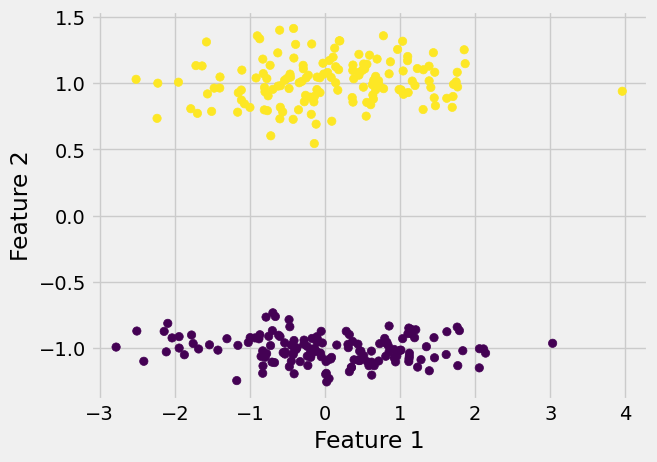

In [31]:
import torch
import torch.nn as nn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_classification

features, targets = make_classification(    
                                        n_samples = 300,
                                        n_features = 2,
                                        n_informative = 1,
                                        n_redundant = 0,
                                        n_clusters_per_class = 1,
                                        random_state = 1
                                        )

plt.style.use('fivethirtyeight')
plt.scatter(features[:,0], features[:,1], c=targets)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [32]:
inputs = torch.from_numpy(features).float()
targets = torch.from_numpy(targets).float().unsqueeze(1)

# Split the dataset into train and test
train_inputs = inputs[:200]
train_targets = targets[:200]
test_inputs = inputs[200:]
test_targets = targets[200:]

In [33]:
class LogisticRegression(nn.Module):
    def __init__(self):
        super(LogisticRegression, self).__init__()
        
        # Define the linear layer with 2 input features and 1 output feature
        self.linear = nn.Linear(2, 1)
        
        # Define the sigmoid activation function
        self.sigmoid = nn.Sigmoid()
    
    # Define the forward pass of the model
    def forward(self, x):
        out = self.linear(x) # Pass the input through the linear layer
        out = self.sigmoid(out) # Apply the sigmoid activation function
        return out


In [ ]:
model = LogisticRegression()
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), 
                             lr=0.01, 
                             betas=(0.9, 0.999),
                             eps=1e-08,
                             weight_decay=0,
                             amsgrad=False)


# Iterate over epochs
for epoch in range(1000):
    # Zero the gradients
    optimizer.zero_grad()
    # Forward pass
    outputs = model(train_inputs)
    # Calculate loss
    loss = criterion(outputs, train_targets)
    # Backward pass
    loss.backward()
    # Update parameters
    optimizer.step()

    if (epoch+1) % 100 == 0:
        print(f'Epoch: {epoch+1}, Loss: {loss.item():.4f}')


Epoch: 100, Loss: 0.4699
Epoch: 200, Loss: 0.2604
Epoch: 300, Loss: 0.1629
Epoch: 400, Loss: 0.1118
Epoch: 500, Loss: 0.0818
Epoch: 600, Loss: 0.0628
Epoch: 700, Loss: 0.0499
Epoch: 800, Loss: 0.0407
Epoch: 900, Loss: 0.0339
Epoch: 1000, Loss: 0.0287


In [35]:
with torch.no_grad():
    # Forward pass on the test set
    outputs = model(test_inputs)

    # Convert the outputs to binary predictions
    predictions = (outputs >= 0.5).float()

    # Compute the accuracy
    accuracy = ((predictions == test_targets).sum() / test_targets.shape[0]).item()

    # Print the accuracy
    print('Test Accuracy: {:.4f}'.format(accuracy))

Test Accuracy: 1.0000
